In [35]:
from graphviz import Digraph

In [36]:
class TrieH:
    def __init__(self , c , inf, eq , sup, v=None ):
        self.c = c
        self.inf = inf
        self.eq = eq
        self.sup = sup
        self.v = v

In [37]:
class TH:
    def __init__(self):
        self.racine = None

    def EstVide(self):
        return self.racine == None
    
    def lg(self , mot):
        return len(mot)

    def prem(self , mot):
        return mot[0]
    
    def reste(self , mot):
        return mot[1:]

    def TH_Vide(self):
        return None
    
    def ValVide(self):
        return None
    
    def TH_Racine(self):
        return self.racine.c
    
    def Inf(self):
        return self.racine.inf

    def Eq(self):
        return self.racine.eq
    
    def Sup(self):
        return self.racine.sup
    
    def Val(self):
        return self.racine.v
    
    # Ajouter un mot dans le trie hybride
    def ajouter(self, mot, A , v):
        if A is None:
            if self.lg(mot) == 1:
                return TrieH(self.prem(mot) , None , None , None , v)
            else:
                A = TrieH(self.prem(mot) , None , self.ajouter(self.reste(mot), self.TH_Vide() , v) , None , None)
                return A
        else:
            p = self.prem(mot)
            if p < A.c:
                # A.inf = self.ajouter( mot , A.inf , v)
                return TrieH(A.c , self.ajouter( mot , A.inf , v) , A.eq , A.sup , A.v)
            if p > A.c:
                # A.sup = self.ajouter( mot , A.sup , v)
                return TrieH(A.c , A.inf , A.eq , self.ajouter( mot , A.sup , v) , A.v)
            return TrieH(A.c , A.inf , self.ajouter( self.reste(mot) , A.eq , v) , A.sup , A.v)


    # recherche un mot dans le trie hybride
    def recherche(self, mot, A):
        if A is None:
            return False
        if self.lg(mot) == 1 and A.c == mot and A.v is not None:
            return True
        p = self.prem(mot)
        if p < A.c:
            return self.recherche(mot, A.inf)
        elif p > A.c:
            return self.recherche(mot, A.sup)
        else:
            return self.recherche(self.reste(mot), A.eq)
        
        
    def supprime(self, mot, A):
        if A is None:
            return None
        p = self.prem(mot)
        if p < A.c:
            A.inf = self.supprime(mot, A.inf)
        elif p > A.c:
            A.sup = self.supprime(mot, A.sup)
        elif p == A.c:
            if self.lg(mot) == 1:
                if A.v is not None:
                    A.v = None
            else:
                A.eq = self.supprime(self.reste(mot), A.eq)        

        # Cas de suppression de la racine
        if A.c == self.racine.c and A.eq is None and A.inf is None and A.sup is None and A.v is None and self.racine.eq == A.eq and self.racine.inf == A.inf and self.racine.sup == A.sup and self.racine.v == A.v:
            self.racine = None
            return self.racine


        # Cas de suppression hors de la racine
        if self.prem(mot) == A.c and A.eq is None and A.inf is None and A.sup is None and A.v is None:
            A= None
            return A

        
        if self.lg(mot) == 1 :
            if A.v is not None:
                A.v = None
            if A.eq is not None:
                return A
            
        if A.inf is None and A.eq is None and A.sup is None and A.v is None:
            return None
        
        if A.inf is not None and A.eq is None and A.sup is not None:        
            A = self.Fusion(A.inf, A.sup)
            return A
        
        # if A.inf is not None and A.eq is not None and A.sup is None:
        #     A = self.Fusion(A.inf, A.eq)
        #     return A
        
        # if A.inf is None and A.eq is not None and A.sup is not None:
        #     A = self.Fusion(A.eq, A.sup)
        #     return A
        if A.inf is not None and A.eq is None and A.sup is None:
            return A.inf
        if A.inf is None and A.eq is None and A.sup is not None:
            return A.sup
    
        return A
        
    # Fusionner deux arbres
    def Fusion(self, A, B): 
        if A is None:
            return B
        if B is None:
            return A
        if A is not None and B is not None:
            if A.c < B.c:
                A.sup = self.Fusion(A.sup, B)
                return A
            if A.c > B.c:
                B.inf = self.Fusion(A, B.inf)
                return B
            if A.c == B.c:
                A.eq = self.Fusion(A.eq, B.eq)
                return A        

    

       
    def visualiser_arbre(self):
        dot = Digraph()
        fontsize = "10"

        def generer_graphique(A, dot=dot):
            if A is not None:
                dot.node(str(id(A)), label=f"{A.c} {({str(A.v)}) if A.v is not None else ''}")

                if A.inf is not None:
                    dot.node(str(id(A.inf)), label=f"{A.inf.c} (Inf)")
                    dot.edge(str(id(A)), str(id(A.inf)) , label="Inf", fontsize=fontsize )
                    generer_graphique(A.inf)

                if A.eq is not None:
                    dot.node(str(id(A.eq)), label=f"{A.eq.c} (Eq)")
                    dot.edge(str(id(A)), str(id(A.eq)) , label="Eq", fontsize=fontsize )
                    generer_graphique(A.eq)

                if A.sup is not None:
                    dot.node(str(id(A.sup)), label=f"{A.sup.c} (Sup)")
                    dot.edge(str(id(A)), str(id(A.sup)) , label="Sup", fontsize=fontsize )
                    generer_graphique(A.sup)

        generer_graphique(self.racine)
        return dot





def afficher_trie_hybride_arbre(A, prefixe="", est_dernier=True, lien=""):
    if A is not None:
        marker = "└── " if est_dernier else "├── "
        print(f"{prefixe}{marker}Caractère: {A.c} ({lien})", "Valeur: ", A.v if A.v is not None else "None")
        afficher_trie_hybride_arbre(A.inf, f"{prefixe}{'    ' if est_dernier else '│   '}", False, "Inf")
        afficher_trie_hybride_arbre(A.eq, f"{prefixe}{'    ' if est_dernier else '│   '}", False, "Eq")
        afficher_trie_hybride_arbre(A.sup, f"{prefixe}{'    ' if est_dernier else '│   '}", True, "Sup")


In [38]:
trie_hybride = TH()

trie_hybride.racine = trie_hybride.ajouter("chat", trie_hybride.racine, 1)
afficher_trie_hybride_arbre(trie_hybride.racine)
print("--------------------------------------------------")

trie_hybride.racine = trie_hybride.ajouter("chien", trie_hybride.racine, 2)
afficher_trie_hybride_arbre(trie_hybride.racine)
print("--------------------------------------------------")

trie_hybride.racine = trie_hybride.ajouter("cheval", trie_hybride.racine, 3)
afficher_trie_hybride_arbre(trie_hybride.racine)
print("--------------------------------------------------")

trie_hybride.racine = trie_hybride.ajouter("bonjour", trie_hybride.racine, 4)
afficher_trie_hybride_arbre(trie_hybride.racine)
print("--------------------------------------------------")

trie_hybride.racine = trie_hybride.ajouter("bien", trie_hybride.racine, 5)
afficher_trie_hybride_arbre(trie_hybride.racine)
print("--------------------------------------------------")

trie_hybride.racine = trie_hybride.ajouter("merci", trie_hybride.racine, 6)
afficher_trie_hybride_arbre(trie_hybride.racine)
print("--------------------------------------------------")

trouver = trie_hybride.recherche("chat", trie_hybride.racine)
print(trouver)

trouver = trie_hybride.recherche("meow", trie_hybride.racine)
print(trouver)

trouver = trie_hybride.recherche("chien", trie_hybride.racine)
print(trouver)

trouver = trie_hybride.recherche("vache", trie_hybride.racine)
print(trouver)

└── Caractère: c () Valeur:  None
    ├── Caractère: h (Eq) Valeur:  None
    │   ├── Caractère: a (Eq) Valeur:  None
    │   │   ├── Caractère: t (Eq) Valeur:  1
--------------------------------------------------
└── Caractère: c () Valeur:  None
    ├── Caractère: h (Eq) Valeur:  None
    │   ├── Caractère: a (Eq) Valeur:  None
    │   │   ├── Caractère: t (Eq) Valeur:  1
    │   │   └── Caractère: i (Sup) Valeur:  None
    │   │       ├── Caractère: e (Eq) Valeur:  None
    │   │       │   ├── Caractère: n (Eq) Valeur:  2
--------------------------------------------------
└── Caractère: c () Valeur:  None
    ├── Caractère: h (Eq) Valeur:  None
    │   ├── Caractère: a (Eq) Valeur:  None
    │   │   ├── Caractère: t (Eq) Valeur:  1
    │   │   └── Caractère: i (Sup) Valeur:  None
    │   │       ├── Caractère: e (Inf) Valeur:  None
    │   │       │   ├── Caractère: v (Eq) Valeur:  None
    │   │       │   │   ├── Caractère: a (Eq) Valeur:  None
    │   │       │   │   │   ├── Carac

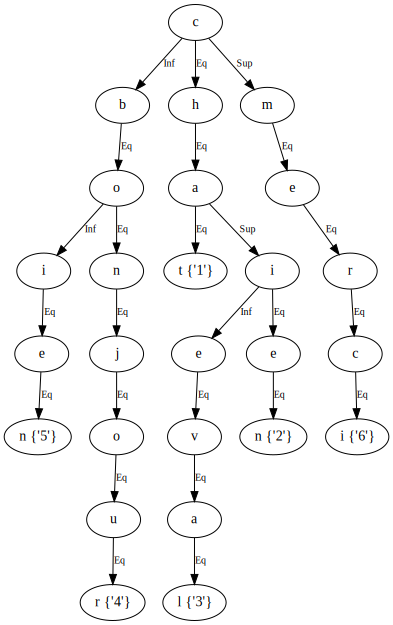

In [39]:
trie_hybride.visualiser_arbre()

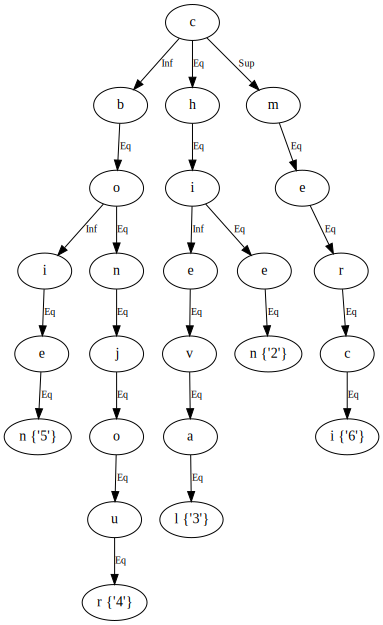

In [40]:
trie_hybride.supprime("chat", trie_hybride.racine)
trie_hybride.visualiser_arbre()

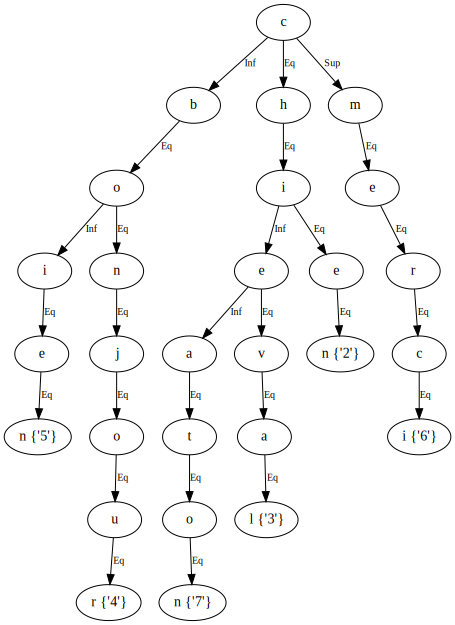

In [41]:
trie_hybride.racine = trie_hybride.ajouter("chaton", trie_hybride.racine, 7)
trie_hybride.visualiser_arbre()

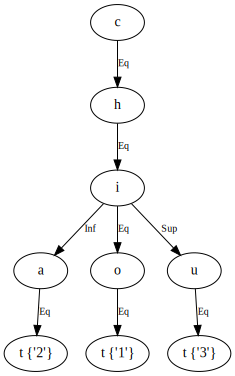

In [42]:
TrieTest = TH()
TrieTest.racine = TrieTest.ajouter("chiot", TrieTest.racine, 1)
TrieTest.racine = TrieTest.ajouter("chat", TrieTest.racine, 2)
TrieTest.racine = TrieTest.ajouter("chut", TrieTest.racine, 3)
TrieTest.visualiser_arbre()

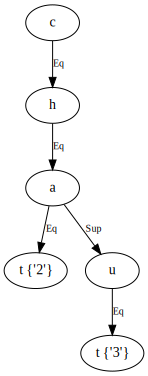

In [43]:
TrieTest.supprime("chiot", TrieTest.racine)
TrieTest.visualiser_arbre()

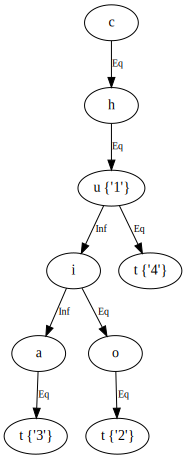

In [44]:
TrieTest2 = TH()
TrieTest2.racine = TrieTest2.ajouter("chu", TrieTest2.racine, 1)
TrieTest2.racine = TrieTest2.ajouter("chiot", TrieTest2.racine, 2)
TrieTest2.racine = TrieTest2.ajouter("chat", TrieTest2.racine, 3)
TrieTest2.racine = TrieTest2.ajouter("chut", TrieTest2.racine, 4)
TrieTest2.visualiser_arbre()

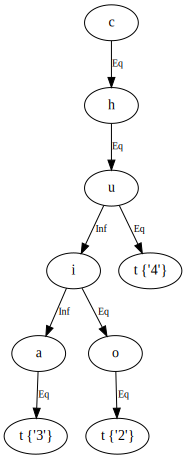

In [45]:
TrieTest2.supprime("chu", TrieTest2.racine)
TrieTest2.visualiser_arbre()

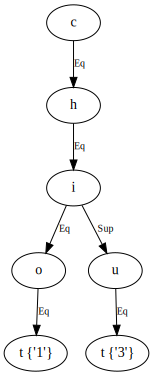

In [46]:
TrieTest3 = TH()
TrieTest3.racine = TrieTest3.ajouter("chiot", TrieTest3.racine, 1)
TrieTest3.racine = TrieTest3.ajouter("chat", TrieTest3.racine, 2)
TrieTest3.racine = TrieTest3.ajouter("chut", TrieTest3.racine, 3)

TrieTest3.supprime("chat", TrieTest3.racine)
TrieTest3.visualiser_arbre()

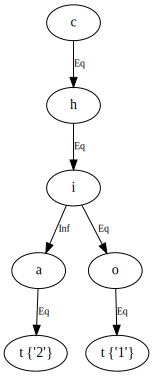

In [47]:
TrieTest4 = TH()
TrieTest4.racine = TrieTest4.ajouter("chiot", TrieTest4.racine, 1)
TrieTest4.racine = TrieTest4.ajouter("chat", TrieTest4.racine, 2)
TrieTest4.racine = TrieTest4.ajouter("chut", TrieTest4.racine, 3)

TrieTest4.supprime("chut", TrieTest4.racine)
TrieTest4.visualiser_arbre()

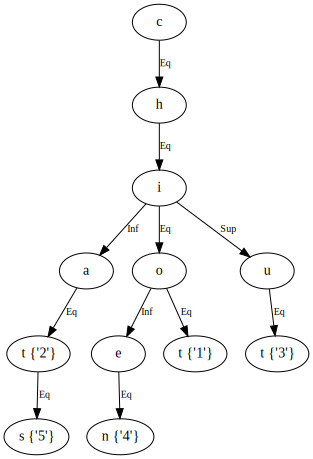

In [48]:
TrieTest5 = TH()
TrieTest5.racine = TrieTest5.ajouter("chiot", TrieTest5.racine, 1)
TrieTest5.racine = TrieTest5.ajouter("chat", TrieTest5.racine, 2)
TrieTest5.racine = TrieTest5.ajouter("chut", TrieTest5.racine, 3)
TrieTest5.racine = TrieTest5.ajouter("chien", TrieTest5.racine, 4)
TrieTest5.racine = TrieTest5.ajouter("chats", TrieTest5.racine, 5)

TrieTest5.visualiser_arbre()

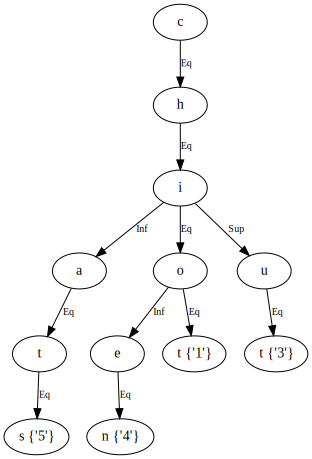

In [49]:
TrieTest5.supprime("chat", TrieTest5.racine)
TrieTest5.visualiser_arbre()

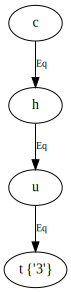

In [50]:
TrieTest5.supprime("chats", TrieTest5.racine)
TrieTest5.supprime("chiot", TrieTest5.racine)
TrieTest5.supprime("chien", TrieTest5.racine)
TrieTest5.visualiser_arbre()

In [51]:
TrieTest5.supprime("chut", TrieTest5.racine)
TrieTest5.visualiser_arbre()